In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [19]:
df=pd.read_pickle("K2-18b-hits_02-14-24-2.pkl")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20975037 entries, 0 to 20975036
Data columns (total 29 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   id                       int64  
 1   beam_id                  int64  
 2   observation_id           int64  
 3   tuning                   object 
 4   subband_offset           int64  
 5   file_uri                 object 
 6   file_local_enumeration   int64  
 7   signal_frequency         float64
 8   signal_index             int64  
 9   signal_drift_steps       int64  
 10  signal_drift_rate        float64
 11  signal_snr               float64
 12  signal_coarse_channel    int64  
 13  signal_beam              int64  
 14  signal_num_timesteps     int64  
 15  signal_power             float64
 16  signal_incoherent_power  float64
 17  source_name              object 
 18  fch1_mhz                 float64
 19  foff_mhz                 float64
 20  tstart                   float64
 21  tsamp 

<AxesSubplot:ylabel='Frequency'>

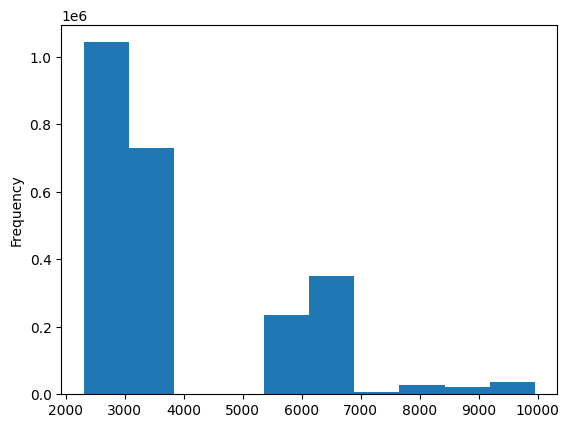

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#df = pd.read_json('hits_collation.json')
#df.plot(kind = 'hist', x = 'signal_driftRate')
df["signal_frequency"].plot(kind = 'hist')
#plt.xlim(-10,10)

In [5]:
print(df.ra_hours,df.dec_degrees)

0         11.504008
1         11.504008
2         11.504008
3         11.504008
4         11.504008
            ...    
108983    11.504008
108984    11.504008
108985    11.504008
108986    11.504008
108987    11.504008
Name: ra_hours, Length: 108988, dtype: float64 0         7.587831
1         7.587831
2         7.587831
3         7.587831
4         7.587831
            ...   
108983    7.587831
108984    7.587831
108985    7.587831
108986    7.587831
108987    7.587831
Name: dec_degrees, Length: 108988, dtype: float64


(-1.0, 1.0)

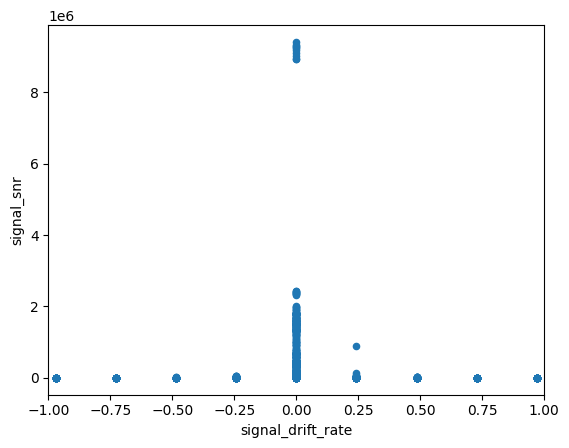

In [6]:
df.plot(kind = 'scatter', x = 'signal_drift_rate', y='signal_snr')
#df["signal_snr"].plot(kind = 'hist')
plt.xlim(-1,1)

[11.50400833 11.50400833 11.50400833 ... 11.50400833 11.50400833
 11.50400833]


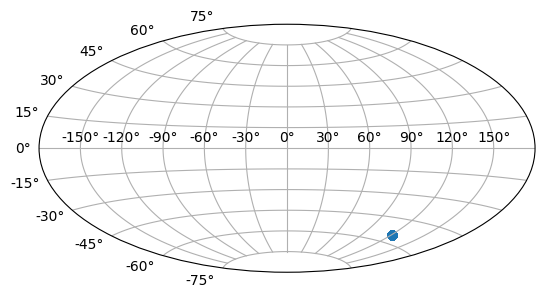

In [9]:
import math as m
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
from astropy.coordinates import SkyCoord
%matplotlib inline
xarr2 = np.array(df.iloc[:,7])
yarr2 = np.array(df.iloc[:,8])
#eq = SkyCoord(xarr[:], yarr[:], unit=u.radian)
#gal = eq.galactic
eq = SkyCoord(xarr2[:], yarr2[:],frame='fk5', unit=u.deg)
gal = eq.galactic
print(xarr2)
plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.l.wrap_at('180d').radian, gal.b.radian)

<AxesSubplot:xlabel='signal_frequency', ylabel='signal_snr'>

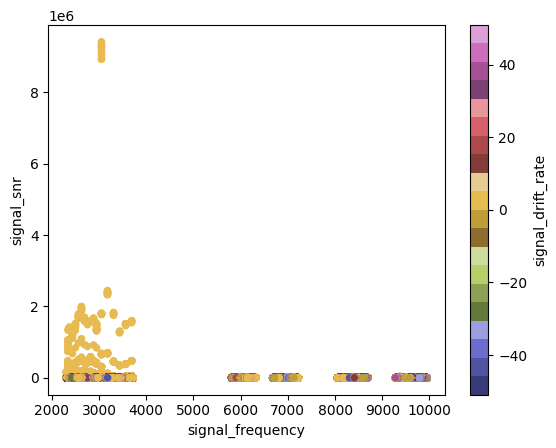

In [7]:
df.plot(kind = 'scatter', x = 'signal_frequency', y='signal_snr', c='signal_drift_rate',cmap="tab20b",)

<AxesSubplot:xlabel='tstart', ylabel='signal_frequency'>

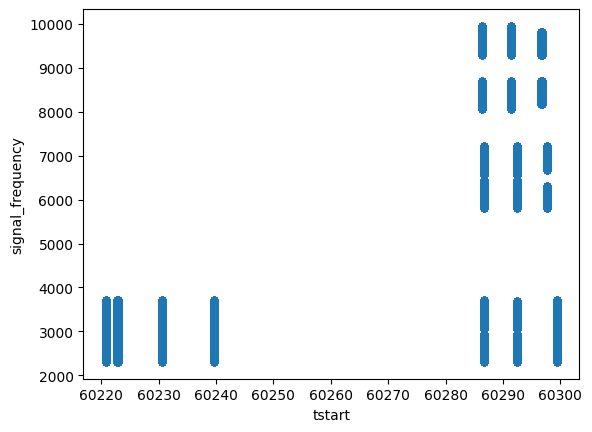

In [21]:
df.plot(kind = 'scatter', x = 'tstart', y='signal_frequency')

In [24]:
print(df.source_name)

0           3910747531814692736
1           3910747531814692736
2           3910747531814692736
3           3910747531814692736
4           3910747531814692736
                   ...         
20975032             Incoherent
20975033             Incoherent
20975034             Incoherent
20975035             Incoherent
20975036             Incoherent
Name: source_name, Length: 20975037, dtype: object


In [14]:
df.loc[~df.signal_drift_rate.between(-0.1, 0.1)]

,id,observation_id,tuning,subband_offset,file_uri,file_local_enumeration,source_name,ra_hours,dec_degrees,fch1_mhz,...,signal_index,signal_drift_steps,signal_drift_rate,signal_snr,signal_beam,signal_coarse_channel,signal_num_timesteps,signal_power,signal_incoherent_power,beam_id
1,101494792,13362,AC,672,/mnt/cosmic-storage-2/data2/K2-18b/23B-307_TES...,1,K2-18,11.504008,7.587831,2659.918708,...,219786,-1,-0.242532,2496.801758,4,0,16,6.374070e+13,0.0,456833
4,101494795,13362,AC,672,/mnt/cosmic-storage-2/data2/K2-18b/23B-307_TES...,4,K2-18,11.504008,7.587831,2659.845969,...,181649,1,0.242532,1170.548950,4,0,16,2.995065e+13,0.0,456833
5,101494796,13362,AC,672,/mnt/cosmic-storage-2/data2/K2-18b/23B-307_TES...,5,K2-18,11.504008,7.587831,2659.776227,...,145085,-1,-0.242532,1099.944214,4,0,16,2.815180e+13,0.0,456833
7,101494798,13362,AC,672,/mnt/cosmic-storage-2/data2/K2-18b/23B-307_TES...,7,K2-18,11.504008,7.587831,2659.667602,...,88133,2,0.485064,486.463593,4,0,16,1.252164e+13,0.0,456833
13,101494804,13362,AC,672,/mnt/cosmic-storage-2/data2/K2-18b/23B-307_TES...,13,K2-18,11.504008,7.587831,2659.873651,...,196163,-1,-0.242532,273.524780,4,0,16,7.096424e+12,0.0,456833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108975,101603766,13362,AC,320,/mnt/cosmic-storage-2/data2/K2-18b/23B-307_TES...,487,K2-18,11.504008,7.587831,2320.909490,...,214953,-1,-0.242532,49.706585,2,13,16,3.366891e+13,0.0,456876
108980,101603771,13362,AC,320,/mnt/cosmic-storage-2/data2/K2-18b/23B-307_TES...,492,K2-18,11.504008,7.587831,2320.920501,...,220726,-1,-0.242532,45.232231,0,13,16,2.808239e+13,0.0,456874
108981,101603772,13362,AC,320,/mnt/cosmic-storage-2/data2/K2-18b/23B-307_TES...,493,K2-18,11.504008,7.587831,2321.298543,...,418929,-1,-0.242532,44.977383,1,13,16,3.165311e+13,0.0,456875
108984,101603775,13362,AC,320,/mnt/cosmic-storage-2/data2/K2-18b/23B-307_TES...,496,K2-18,11.504008,7.587831,2320.810391,...,162997,-1,-0.242532,43.712265,2,13,16,2.986200e+13,0.0,456876


In [8]:
nonzero_drift=df.loc[~df.signal_drift_rate.between(-1, 1)]

In [22]:
beam0=df.loc[df.signal_beam==0]

In [26]:
beam1=df.loc[df.signal_beam==1]
beam2=df.loc[df.signal_beam==2]
beam3=df.loc[df.signal_beam==3]
beam4=df.loc[df.signal_beam==4]

In [27]:
print(len(beam0))
print(len(beam1))
print(len(beam2))
print(len(beam3))
print(len(beam4))

4058807
4061969
4060767
4059521
4027224


In [39]:
#beam0_only=df.loc[~beam0['signal_frequency'].isin(beam1['signal_frequency']), 'signal_frequency']
#a_set=beam0.signal_frequency.unique()
#b_set=beam1.signal_frequency.unique()
#beam0_only=np.subtract(a_set,b_set) # list of areas in a but not in b
#beam1_only=b_set-a_set # list of areas in b but not in a
#df_unique = df.loc[~(beam0.signal_frequency.isin(beam1['signal_frequency']) and ~(beam1['signal_frequency'].isin(beam0['signal_frequency']))]
df_unique=beam0.loc[~beam0['signal_frequency'].isin(beam1['signal_frequency']), 'signal_frequency'].unique()

In [42]:
print(len(df_unique))

697389


In [34]:
beam0_only.plot(kind = 'scatter', x = 'signal_frequency', y='signal_snr', c='signal_drift_rate',cmap="tab20b",)

AttributeError: 'set' object has no attribute 'plot'

In [9]:
nonzero_drift.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396433 entries, 50 to 2446476
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       396433 non-null  int64  
 1   observation_id           396433 non-null  int64  
 2   tuning                   396433 non-null  object 
 3   subband_offset           396433 non-null  int64  
 4   file_uri                 396433 non-null  object 
 5   file_local_enumeration   396433 non-null  int64  
 6   source_name              396433 non-null  object 
 7   ra_hours                 396433 non-null  float64
 8   dec_degrees              396433 non-null  float64
 9   fch1_mhz                 396433 non-null  float64
 10  foff_mhz                 396433 non-null  float64
 11  tstart                   396433 non-null  float64
 12  tsamp                    396433 non-null  float64
 13  telescope_id             396433 non-null  int64  
 14  nu

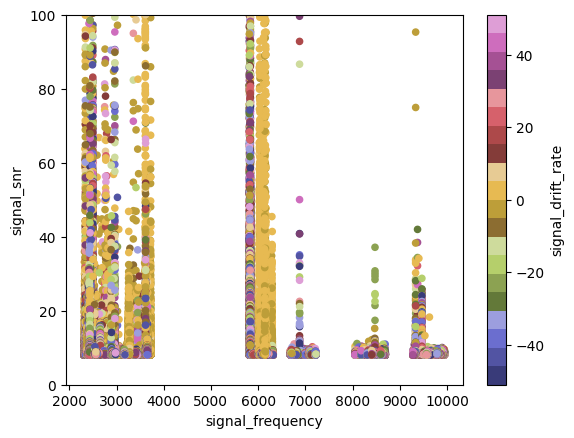

In [10]:
nonzero_drift.plot(kind = 'scatter', x = 'signal_frequency', y='signal_snr', c='signal_drift_rate',cmap="tab20b",ylim=(0,100))
ylim=(0,100)

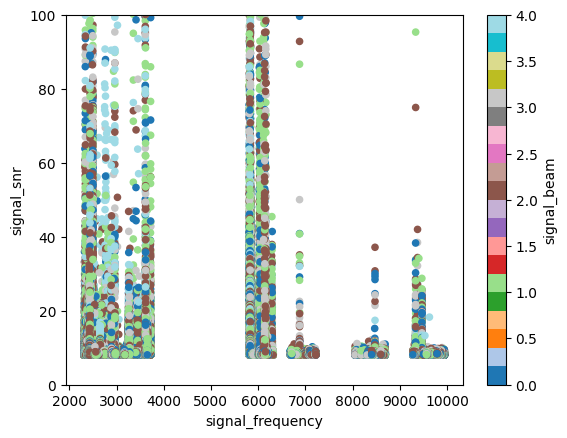

In [12]:
nonzero_drift.plot(kind = 'scatter', x = 'signal_frequency', y='signal_snr', c='signal_beam',cmap="tab20",ylim=(0,100))
ylim=(0,100)

<AxesSubplot:ylabel='Frequency'>

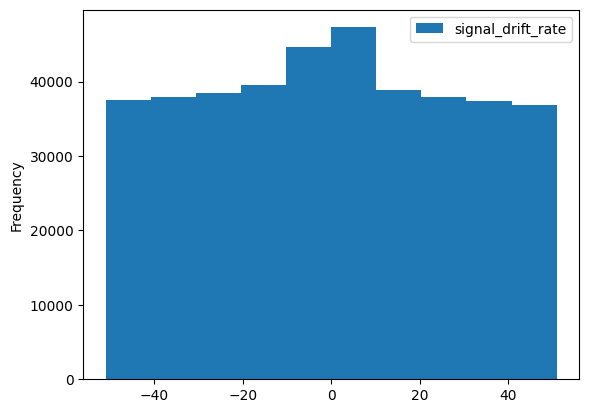

In [15]:
nonzero_drift.plot(kind = 'hist', x = 'signal_frequency', y='signal_drift_rate')
